## ECSE 415, Assignment 2 / part 2



## 2 Matching using SIFT - Book Reveal
    -Find SIFT keypoints in given input images.
    -Match keypoints of reference image to the keypoints of the occluded image using brute-force method. 
    -Sort matching keypoints according to the matching distance.
    -Display top ten matching keypoints.
    -Compute a homography to align the images using RANSAC method and apply the transformation on the reference 
     image. 
    -Paste transformed reference image on the occluded view to generate unoccluded view as shown in Figure 2(c).

In [7]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


Computed Homography Matrix:
[[ 6.32225798e-01  1.29330671e-01  1.27580418e+02]
 [-1.30011826e-01  5.89037883e-01  5.73430295e+01]
 [ 1.08718649e-04 -1.90370816e-05  1.00000000e+00]]


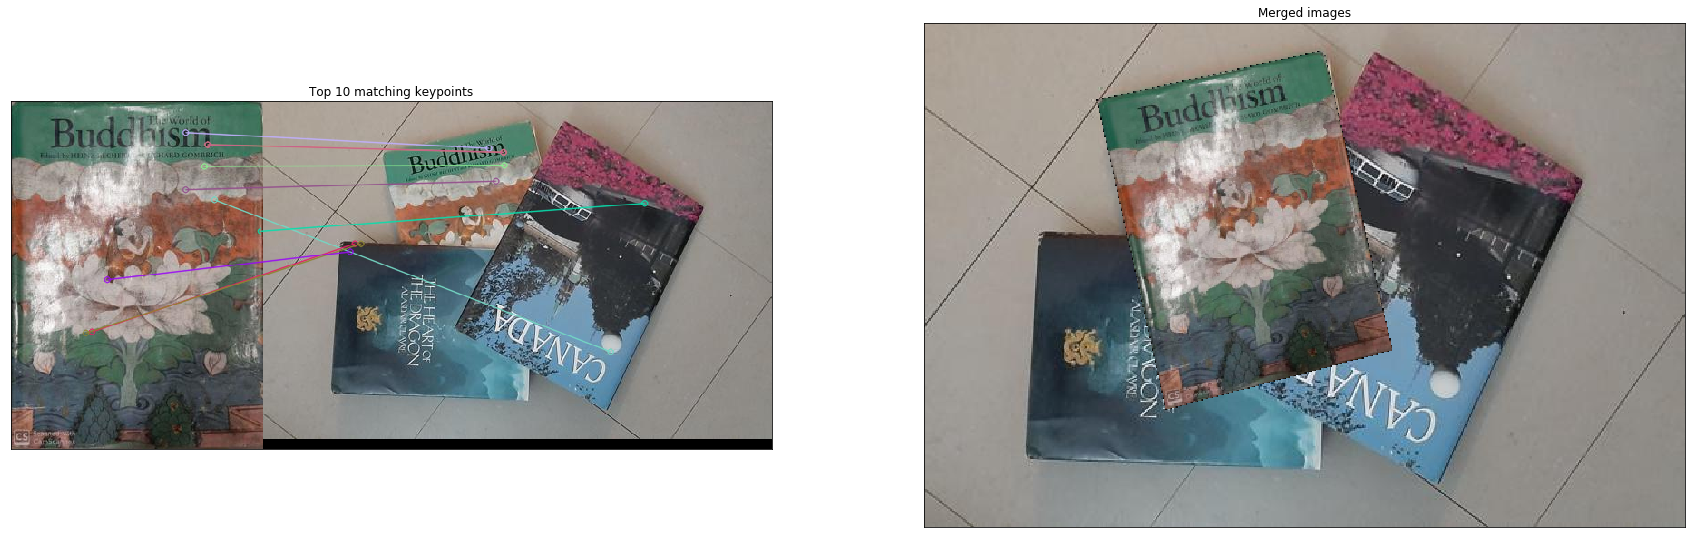

In [8]:
# load image 
img1 = cv2.imread("book_occlusion.jpg")
img2 = cv2.imread("book_crop.jpg")

# Convert to RGB scale
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

# Compute keypoints and descriptors
sift_obj = cv2.xfeatures2d.SIFT_create()

keypoints_1, descriptors_1 = sift_obj.detectAndCompute(img1, None)
keypoints_2, descriptors_2 = sift_obj.detectAndCompute(img2, None)

# create BFMatcher object
bf = cv2.BFMatcher()

# Match descriptors.
matches = bf.match(descriptors_2,descriptors_1) 

# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

# Draw keypoints 
img_matches = cv2.drawMatches(img2, keypoints_2, img1, keypoints_1, matches[:10], None, flags=2)

# Arrange matching keypoints in two separate lists
GoodMatches = []
for i, m in enumerate(matches):
    if m.distance < 150:
        GoodMatches.append((m.trainIdx, m.queryIdx))

mp2 = np.float32([keypoints_2[i].pt for (__, i) in GoodMatches])
mp1 = np.float32([keypoints_1[i].pt for (i, __) in GoodMatches])

# find homography and wrap image accordingly
H, __ = cv2.findHomography(mp2, mp1, cv2.RANSAC, 4)
print("\nComputed Homography Matrix:")
print(H)
wimage = cv2.warpPerspective(img2, H, (img1.shape[1], img1.shape[0]))

height, width, channels = wimage.shape
resizeBack = cv2.resize(img1, (width, height), interpolation = cv2.INTER_CUBIC)

for i in range (width):
    for j in range (height):
        pixel = wimage[j, i]
        if np.all(pixel == [0,0,0]):
            wimage[j,i] = resizeBack[j,i]
            
plt.figure(figsize = (30,30))
plt.subplot(121)
plt.imshow(img_matches), plt.title("Top 10 matching keypoints")
plt.xticks([]), plt.yticks([])
plt.subplot(122)
plt.imshow(wimage),plt.title("Merged images")
plt.xticks([]), plt.yticks([])
plt.show()

